In [18]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


In [19]:
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()



In [20]:
# Mise à l’échelle des pixels (normalisation) :
x_train = x_train / 255.0
x_test = x_test / 255.0


In [21]:
#Reshape (Keras attend un format [batch, height, width, channels])
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


In [22]:
# Encodage one-hot des labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


In [23]:
#Génerateur de data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(x_train)


In [24]:
#L'architecture de CNN
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
#Complier le modéle
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
#Entraîner le modèle sans data augmentation
model_no_aug = model
history = model_no_aug.fit(x_train, y_train_cat,
                    epochs=20,
                    batch_size=64,
                    validation_split=0.2)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 50s 65ms/step - accuracy: 0.6503 - loss: 0.9620 - val_accuracy: 0.8390 - val_loss: 0.4360
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 80s 62ms/step - accuracy: 0.8236 - loss: 0.4835 - val_accuracy: 0.8674 - val_loss: 0.3619
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 50s 66ms/step - accuracy: 0.8481 - loss: 0.4204 - val_accuracy: 0.8810 - val_loss: 0.3200
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 48s 64ms/step - accuracy: 0.8617 - loss: 0.3824 - val_accuracy: 0.8842 - val_loss: 0.3087
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 63ms/step - accuracy: 0.8719 - loss: 0.3495 - val_accuracy: 0.8907 - val_loss: 0.2979
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 83s 64ms/step - accuracy: 0.8788 - loss: 0.3392 - val_accuracy: 0.8923 - val_loss: 0.2867
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 83s 66ms/step - accuracy: 0.8840 - loss: 0.3214 - val_accuracy: 0.8974 - val_loss: 0.2795
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 66ms/step - accuracy: 0.8887 - loss: 0.3065 - 

In [27]:
#Entraîner le modèle avec data augmentation
model_aug = model
history_aug = model_aug.fit(
    datagen.flow(x_train, y_train_cat, batch_size=64),
    epochs=20,
    validation_data=(x_test, y_test_cat)
)



Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


938/938 ━━━━━━━━━━━━━━━━━━━━ 75s 79ms/step - accuracy: 0.7886 - loss: 0.5766 - val_accuracy: 0.8933 - val_loss: 0.2796
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 74s 79ms/step - accuracy: 0.8183 - loss: 0.4894 - val_accuracy: 0.8916 - val_loss: 0.2893
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 74s 79ms/step - accuracy: 0.8302 - loss: 0.4650 - val_accuracy: 0.8979 - val_loss: 0.2788
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 75s 80ms/step - accuracy: 0.8350 - loss: 0.4510 - val_accuracy: 0.8968 - val_loss: 0.2832
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 80ms/step - accuracy: 0.8384 - loss: 0.4352 - val_accuracy: 0.8949 - val_loss: 0.2824
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 73s 77ms/step - accuracy: 0.8461 - loss: 0.4220 - val_accuracy: 0.8975 - val_loss: 0.2786
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 84s 80ms/step - accuracy: 0.8446 - loss: 0.4208 - val_accuracy: 0.8969 - val_loss: 0.2783
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 73s 77ms/step - accuracy: 0.8480 - loss: 0.4161 - val_accurac

In [28]:
# Évaluation et comparaison
# Accuracy finale
_, acc_no_aug = model_no_aug.evaluate(x_test, y_test_cat)
_, acc_aug = model_aug.evaluate(x_test, y_test_cat)

print(f"Test Accuracy sans augmentation : {acc_no_aug:.4f}")
print(f"Test Accuracy avec augmentation  : {acc_aug:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8908 - loss: 0.2918
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8908 - loss: 0.2918
Test Accuracy sans augmentation : 0.8928
Test Accuracy avec augmentation  : 0.8928


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


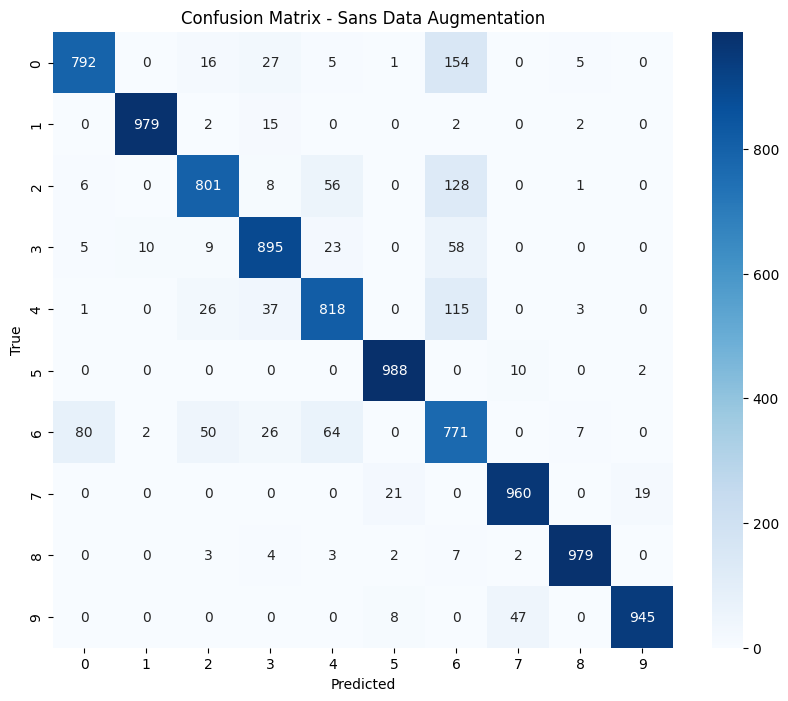

Classification Report - Sans Data Augmentation
              precision    recall  f1-score   support

           0       0.90      0.79      0.84      1000
           1       0.99      0.98      0.98      1000
           2       0.88      0.80      0.84      1000
           3       0.88      0.90      0.89      1000
           4       0.84      0.82      0.83      1000
           5       0.97      0.99      0.98      1000
           6       0.62      0.77      0.69      1000
           7       0.94      0.96      0.95      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.94      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.89      0.89     10000



In [29]:
#Rapport pour le modèle sans data augmentation
# Prédictions
y_pred_no_aug = model_no_aug.predict(x_test)
y_pred_classes_no_aug = np.argmax(y_pred_no_aug, axis=1)

# Matrice de confusion
conf_mat_no_aug = confusion_matrix(y_test, y_pred_classes_no_aug)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat_no_aug, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Sans Data Augmentation")
plt.show()

# Rapport de classification
print("Classification Report - Sans Data Augmentation")
print(classification_report(y_test, y_pred_classes_no_aug))


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


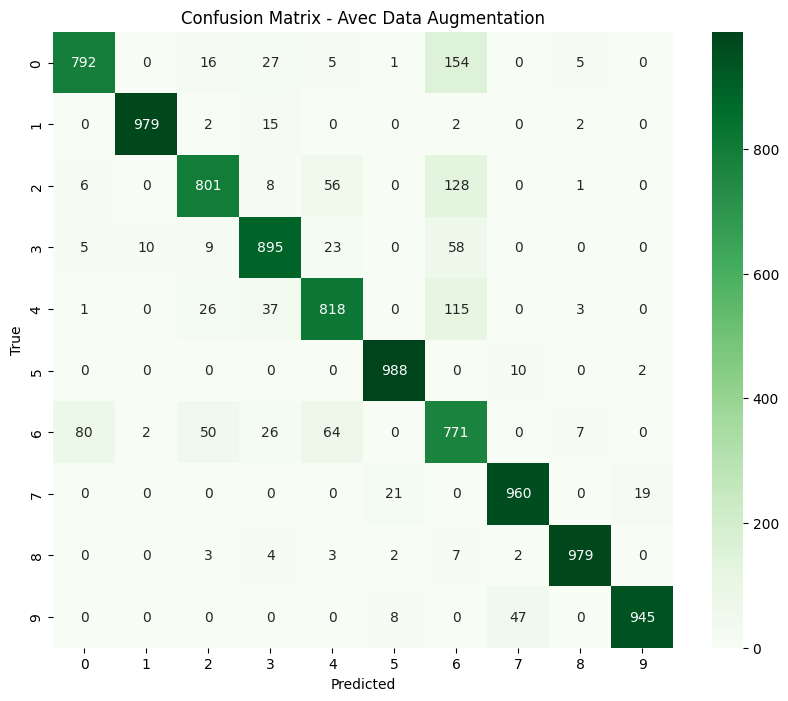

Classification Report - Avec Data Augmentation
              precision    recall  f1-score   support

           0       0.90      0.79      0.84      1000
           1       0.99      0.98      0.98      1000
           2       0.88      0.80      0.84      1000
           3       0.88      0.90      0.89      1000
           4       0.84      0.82      0.83      1000
           5       0.97      0.99      0.98      1000
           6       0.62      0.77      0.69      1000
           7       0.94      0.96      0.95      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.94      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.89      0.89     10000



In [30]:
#Rapport pour le modèle avec data augmentation
# Prédictions
y_pred_aug = model_aug.predict(x_test)
y_pred_classes_aug = np.argmax(y_pred_aug, axis=1)

# Matrice de confusion
conf_mat_aug = confusion_matrix(y_test, y_pred_classes_aug)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat_aug, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Avec Data Augmentation")
plt.show()

# Rapport de classification
print("Classification Report - Avec Data Augmentation")
print(classification_report(y_test, y_pred_classes_aug))

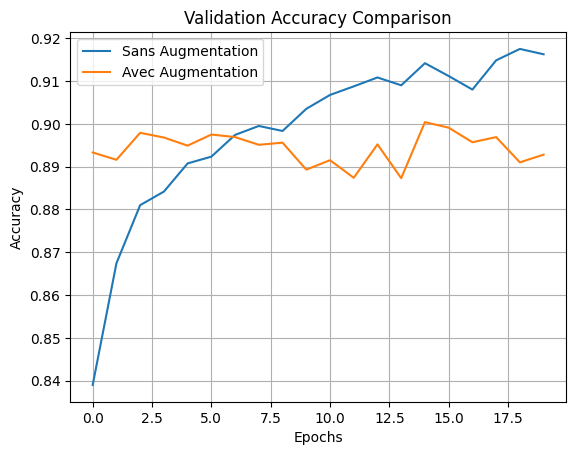

In [31]:
#Courbes comparatives
plt.plot(history.history['val_accuracy'], label="Sans Augmentation")
plt.plot(history_aug.history['val_accuracy'], label="Avec Augmentation")
plt.title("Validation Accuracy Comparison")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()
